## Importe de Bibiliotecas e definição de mêtodos

In [52]:
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import random
import numpy as np


def shuffle(a, b, ratio):
    c = list(zip(a, b))
    random.shuffle(c)
    data, target = zip(*c)
    test:int = int(len(iris.data)*ratio)
    X_train = data[0:test]
    X_test = data[test:]
    Y_train = target[0:test]
    Y_test = target[test:]
    return X_train, X_test, Y_train, Y_test

def metricas(Y_test, predictions):
    confusion_matrix = metrics.confusion_matrix(Y_test, predictions)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])
    cm_display.plot()
    plt.show()
    accuracy = metrics.accuracy_score(Y_test, predictions, normalize= True)
    recall = metrics.recall_score(Y_test, predictions, average=None)
    precision = metrics.precision_score(Y_test, predictions, average=None)
    f1 = metrics.f1_score(Y_test, predictions, average=None)
    print("Acuracia:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("f1 score:", f1)


# Analisando implementações de _kNN_, _Naive Bayes_ e _Árvores de Decisão_ pelo ChatGPT
### Lucas Salbego, Gabriel Moszkowicz

Neste trabalho, queremos instruir o ChatGPT a gerar implementações _do zero_ de três algoritmos de Machine Learning vistos em aula: _kNN_, _Naive Bayes_ e _Árvores de Decisão_. Temos o intuito de analisar a qualidade não só das implementações, mas também dos resultados do ChatGPT ao considerar os nossos prompts.

Estaremos interagindo com o modelo em inglês, e a linguagem escolhida será Python.

## kNN

A princípio, vamos começar com o prompt mais direto e ver como o ChatGPT se comporta:

_Prompt: Implement a kNN Model in Python from scratch_

_..._

_ChatGPT: Sure, here's a basic implementation of the k-Nearest Neighbors (kNN) algorithm in Python from scratch:_

```python
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = []
            for i in range(len(self.X_train)):
                distance = np.sqrt(np.sum(np.square(x - self.X_train[i])))
                distances.append((distance, self.y_train[i]))
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.k]
            class_votes = {}
            for neighbor in neighbors:
                if neighbor[1] in class_votes:
                    class_votes[neighbor[1]] += 1
                else:
                    class_votes[neighbor[1]] = 1
            sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
            predictions.append(sorted_votes[0][0])
        return predictions

# Example usage:
if __name__ == "__main__":
    X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    y_train = np.array([0, 0, 1, 1])

    knn = KNN(k=3)
    knn.fit(X_train, y_train)

    X_test = np.array([[1, 1], [2, 2]])
    predictions = knn.predict(X_test)
    print("Predictions:", predictions)

```

_ChatGPT: This code defines a KNN class with fit and predict methods. The fit method is used to train the model with training data, and the predict method is used to make predictions on new data points. The distance metric used here is Euclidean distance, and the class label of the majority of the k nearest neighbors is chosen as the prediction._

O código funciona sem muitas alterações, e pode ser executado a seguir:


In [44]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = []
            for i in range(len(self.X_train)):
                distance = np.sqrt(np.sum(np.square(x - self.X_train[i])))
                distances.append((distance, self.y_train[i]))
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.k]
            class_votes = {}
            for neighbor in neighbors:
                if neighbor[1] in class_votes:
                    class_votes[neighbor[1]] += 1
                else:
                    class_votes[neighbor[1]] = 1
            sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
            predictions.append(sorted_votes[0][0])
        return predictions

Pontos a Fracos:
*  Cálculo de distâncias não é otimizado e roda em O(N^2).
*  Apenas a distância euclidiana é disponibilizada.

Pontos Fortes:
*  Código roda.
*  K é parametrizado.

Abaixo o modelo pode ser testado, sinta-se a vontade para alterar os parâmetros de entrada, como os conjuntos de treino e teste.

In [50]:
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 0, 1, 1])
test = int(len(X_train)*0.75)
a_treino = X_train[0: test]
a_teste = X_train[test:]
print(a_treino)
print(a_teste)
knn = KNN(k=3)
knn.fit(X_train, y_train)

X_test = np.array([[1, 1], [5, 6]])
predictions = knn.predict(X_test)
print("Predictions:", predictions)

[[1 2]
 [2 3]
 [3 4]]
[[4 5]]
Predictions: [0, 1]


### Aplicação Dataset Iris

yabadeedabada


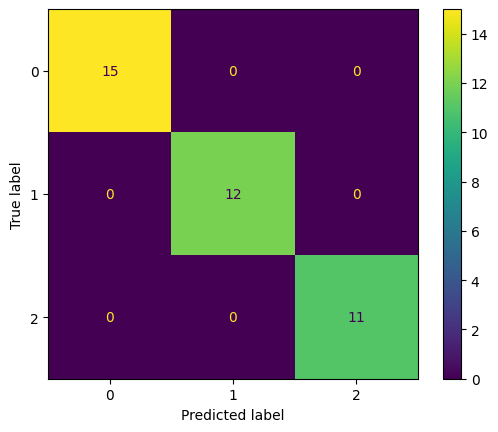

Acuracia: 1.0
Recall: [1. 1. 1.]
Precision: [1. 1. 1.]
f1 score: [1. 1. 1.]


In [53]:
iris = datasets.load_iris()
X_train, X_test, Y_train, Y_test = shuffle(iris.data, iris.target, 0.75)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
metricas(Y_test, predictions)

## Naive Bayes

_Prompt: Implement the Naive Bayes algorithm in Python._

_ChatGPT: This implementation assumes that the input features are binary, but you can adapt it for other types of features or preprocessing steps as needed_.
```py
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.prior = None
        self.likelihood = None
        self.classes = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Initialize prior probabilities
        self.prior = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.prior[i] = np.sum(y == c) / float(n_samples)
        
        # Initialize likelihood probabilities
        self.likelihood = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.likelihood[i] = (np.sum(X_c, axis=0) + 1) / (np.sum(X_c) + n_features)
    
    def predict(self, X):
        posteriors = np.zeros((X.shape[0], len(self.classes)))
        for i, c in enumerate(self.classes):
            prior = np.log(self.prior[i])
            likelihood = np.sum(np.log(self.likelihood[i, :]) * X, axis=1)
            posteriors[:, i] = prior + likelihood
        return np.argmax(posteriors, axis=1)

# Example usage:
X_train = np.array([[1, 1, 0], [1, 0, 0], [0, 1, 1], [0, 0, 1]])
y_train = np.array([0, 1, 1, 0])
X_test = np.array([[1, 0, 1], [0, 1, 0]])

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print("Predictions:", predictions)
```

In [47]:
class NaiveBayes:
    def __init__(self):
        self.prior = None
        self.likelihood = None
        self.classes = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Initialize prior probabilities
        self.prior = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.prior[i] = np.sum(y == c) / float(n_samples)
        
        # Initialize likelihood probabilities
        self.likelihood = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.likelihood[i] = (np.sum(X_c, axis=0) + 1) / (np.sum(X_c) + n_features)
    
    def predict(self, X):
        posteriors = np.zeros((X.shape[0], len(self.classes)))
        for i, c in enumerate(self.classes):
            prior = np.log(self.prior[i])
            likelihood = np.sum(np.log(self.likelihood[i, :]) * X, axis=1)
            posteriors[:, i] = prior + likelihood
        return np.argmax(posteriors, axis=1)

# Example usage:
X_train = np.array([[1, 1, 0], [1, 0, 0], [0, 1, 1], [0, 0, 1]])
y_train = np.array([0, 1, 1, 0])
X_test = np.array([[1, 0, 1], [0, 1, 0]])

nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print("Predictions:", predictions)

Predictions: [0 0]


## Árvore de Decisão
_Prompt: Implement a decision tree prediction algorithm in python._

_ChatGPT: Implementing a decision tree prediction algorithm from scratch can be quite complex due to its intricacies in splitting, pruning, and handling categorical and numerical data. Let's outline a basic version of the decision tree algorithm in Python. We'll focus on a simplified version of the algorithm called the CART (Classification and Regression Trees), which is commonly used for classification tasks._

```py
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to split on
        self.threshold = threshold  # Threshold value for the split
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value if the node is a leaf node

import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)

        # Find the best split
        best_index, best_threshold = self._find_best_split(X, y)

        if best_index is None:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)

        # Split the dataset
        left_indices = X[:, best_index] < best_threshold
        X_left, y_left = X[left_indices], y[left_indices]
        X_right, y_right = X[~left_indices], y[~left_indices]

        # Recursive call to grow left and right child nodes
        left = self._grow_tree(X_left, y_left, depth + 1)
        right = self._grow_tree(X_right, y_right, depth + 1)

        return Node(feature_index=best_index, threshold=best_threshold, left=left, right=right)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gini = float('inf')
        best_index, best_threshold = None, None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                gini = self._gini_impurity(y[left_indices], y[~left_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_index = feature_index
                    best_threshold = threshold

        return best_index, best_threshold

    def _gini_impurity(self, left_labels, right_labels):
        n_left, n_right = len(left_labels), len(right_labels)
        n_total = n_left + n_right

        gini_left = 1.0 - sum((np.sum(left_labels == c) / n_left) ** 2 for c in range(self.n_classes_))
        gini_right = 1.0 - sum((np.sum(right_labels == c) / n_right) ** 2 for c in range(self.n_classes_))

        gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        return gini

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] < node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)

```

_ChatGPT: This is a simplified version of a decision tree algorithm in Python. Real-world implementations would require additional optimizations and handling of various scenarios, such as handling missing values, pruning, and dealing with categorical variables._

In [ ]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to split on
        self.threshold = threshold  # Threshold value for the split
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Value if the node is a leaf node

import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)

        # Find the best split
        best_index, best_threshold = self._find_best_split(X, y)

        if best_index is None:
            leaf_value = np.bincount(y).argmax()
            return Node(value=leaf_value)

        # Split the dataset
        left_indices = X[:, best_index] < best_threshold
        X_left, y_left = X[left_indices], y[left_indices]
        X_right, y_right = X[~left_indices], y[~left_indices]

        # Recursive call to grow left and right child nodes
        left = self._grow_tree(X_left, y_left, depth + 1)
        right = self._grow_tree(X_right, y_right, depth + 1)

        return Node(feature_index=best_index, threshold=best_threshold, left=left, right=right)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gini = float('inf')
        best_index, best_threshold = None, None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                gini = self._gini_impurity(y[left_indices], y[~left_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_index = feature_index
                    best_threshold = threshold

        return best_index, best_threshold

    def _gini_impurity(self, left_labels, right_labels):
        n_left, n_right = len(left_labels), len(right_labels)
        n_total = n_left + n_right

        gini_left = 1.0 - sum((np.sum(left_labels == c) / n_left) ** 2 for c in range(self.n_classes_))
        gini_right = 1.0 - sum((np.sum(right_labels == c) / n_right) ** 2 for c in range(self.n_classes_))

        gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        return gini

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] < node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)

### Análise
* Construção da Árvore é Top Down recursiva.
* Implementa a medida de imperuza Gini.

#### Pontos Fracos

#### Pontos Fortes